In [1]:
from IPython.display import Image

# <font color="brown">01. 원-핫 인코딩(One-Hot Encoding)</font>

---

## <font color="orange">1. 원-핫 인코딩(One-hot encoding)이란?</font>

원-핫 인코딩은 선택해야 하는 선택지 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 **해당하는 원소에는 1**, **나머지 원소는 0**의 값을 가지도록 하는 표현 방법이다.

예를 들어 강아지, 고양이, 냉장고라는 3개의 선택지가 있다고 가정해보자.<br><br>

원-핫 인코딩을 하기 위해서는 우선 각 선택지에 순차적으로 정수 인덱스를 부여한다.

임의로 강아지는 0번 인덱스, 고양이는 1번 인덱스, 냉장고는 2번 인덱스를 부여하였다고 해보도록 하자.

이 때 각 선택지에 대해서 원-핫 인코딩이 된 벡터는 다음과 같다.

강아지 = [1, 0, 0]

고양이 = [0, 1, 0]

냉장고 = [0, 0, 1]

총 선택지는 3개였으므로 위 벡터들은 전부 3차원의 벡터가 되었다.

그리고 각 선택지의 벡터들을 보면 해당 선택지의 인덱스에만 1의 값을 가지고, 나머지 원소들은 0의 값을 가진다.

예를 들어, 고양이는 1번 인덱스였으므로 원-핫 인코딩으로 얻은 벡터에서 1번 인덱스만 1의 값을 가지는 것을 볼 수 있다.<br><br>

이와 같이 원-핫 인코딩으로 표현된 벡터를 **원-핫 벡터(One-hot vector)** 라고 한다.

## <font color="orange">2. 원-핫 벡터의 무작위성</font>

실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 **각 클래스 간의 관계가 균등하다는 점**에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법이다.<br><br>

다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요하다.

이때 직관적으로 생각해볼 수 있는 레이블 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 것이다.

예를 들어, 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블을 한다.

그런데 일반적인 다중 클래스 분류 문제에서 레이블 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 잇다.

**왜 그러한 것일까?**<br><br>

Banana, Tomato, Apple라는 3개의 클래스가 존재하는 문제가 있다고 가정해보도록 하자.

레이블은 정수 인코딩을 사용하여 각각 1, 2, 3을 부여하였다.

손실 함수로 선형 회귀 챕터에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있다.

아래의 식은 앞서 선형 회귀에서 배웠던 MSE를 다시 그대로 가져온 것이다. $\hat{y}$은 예측값을 의미한다.

$$Loss function = \frac{1}{n}\sum_{i}^n (y_i - \hat{y}_i)^2$$

직관적인 오차 크기 비교를 위해 평균을 구하는 수식은 제외하고 제곱 오차로만 판단해보도록 하자.

실제값이 Tomato(2)일 때, 예측값이 Banana(1)이었다면 제곱 오차는 다음과 같다.

$(2 - 1)^2 = 1$

실제값이 Apple(3)일 때, 예측갑이 Banana(1)이었다면 제곱 오차는 다음과 같다.

$(3 - 1)^2 = 4$

즉, Banana와 Tomato 사이의 오차보다 Banana와 Apple의 오차가 더 크다.

이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없다.

더 많은 클래스에 대해서 정수 인코딩을 수행했다고 해보자.

{Banana : 1, Tomato : 2, Apple : 3, Strawberry : 4, ... Watermelon : 10}

이 정수 인코딩은 Banana가 Watermelon보다는 Tomato에 더 가깝다는 의미를 담고 있다.

이는 사용자가 부여하고자 했던 정보가 아니다. 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있다.

예를 들어, {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당된다.

하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳다.

**정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배한다.**<br><br>

아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩했을 때, 각 클래스 간의 제곱 오차가 균등함을 보여준다.

$((1, 0, 0) - (0, 1, 0))^2 = (1 - 0)^2 + (0 - 1)^2 + (0 - 0)^2 = 2$

$((1, 0, 0) - (0, 0, 1))^2 = (1 - 0)^2 + (0 - 0)^2 + (0 - 1)^2 = 2$

다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일하다.

원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있다.

# <font color="brown">02. 소프트맥스 회귀(Softmax Regression) 이해하기</font>

---

이번 챕터에서는 소프트맥스 회귀를 통해 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류(Multi-Class Classification)를 실습해보도록 한다.

## <font color="orange">1. 다중 클래스 분류(Multi-class Classification)</font>

이진 분류가 두 개의 답 중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 한다.

아래의 문제는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제이다.

|SepalLength|SepalWidth|PetalLength|PetalWidth|Species(y)|
|-----|-----|-----|-----|-----|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

위 붓꽃 품종 분류하기 문제를 어떻게 풀지 고민하기 위해 앞서 배운 로지스틱 회귀의 이진 분류를 복습해보도록 하자.<br><br>

이번 챕터의 설명에서 입력은 $X$, 가중치는 $W$, 편향은 $B$, 출력은 $\hat(Y)$로 각 변수는 벡터 또는 행렬로 가정한다.

### 1) 로지스틱 회귀

로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1사이의 값으로 만든다.

예를 들어, 스팸 메일 분류기를 로지스틱 회귀로 구현하였을 때, 출력이 0.75라면 이는 이메일이 스팸일 확률이 75%라는 의미가 된다.

반대로, 스팸 메일이 아닐 확률은 25%가 된다.

이 두 확률의 총 합은 1이다.

$가설 : H(X) = sigmoid(XW + B)$

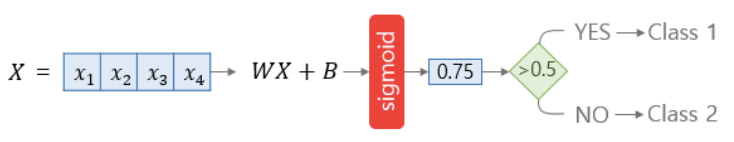

In [5]:
Image("./Images/다중클래스 분류 1.png", width = 500, height = 500)

### 2) 소프트맥스 회귀

소프트맥스 회귀는 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용한다.

소프트맥스 회귀는 각 클래스, 즉 각 선택지마다 소수 확률을 할당한다.

이때 총 확률의 합은 1이 되어야 한다. 이렇게 되면 각 선택지가 정답일 확률로 표현된다.

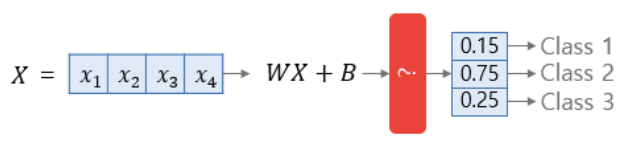

In [6]:
Image("./Images/다중클래스 분류 2.png", width = 500, height = 500)

결국 소프트맥스 회귀는 선택지 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터의 모든 원소 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야 한다.

위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일 때, 3차원 벡터가 어떤 함수를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여준다.

우리는 이 함수를 **소프트맥스(Softmax)** 함수라고 한다.

$가설 : H(X) = softmax(XW + B)$

## <font color="orange">2. 소프트맥스 함수(Softmax function)</font>